## ДЗ Анализ БИВТ-21-16 Столбовский Ярослав

Буду анализировать тяжелый метал!

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

DF = {}

DF['alm'] = pd.read_csv('/content/drive/MyDrive/py/metal_datasets/alternative_metal.csv')
DF['blm'] = pd.read_csv('/content/drive/MyDrive/py/metal_datasets/black_metal.csv')
DF['brm'] = pd.read_csv('/content/drive/MyDrive/py/metal_datasets/british_metal.csv')
DF['dm'] = pd.read_csv('/content/drive/MyDrive/py/metal_datasets/death_metal.csv')
#df_metal = pd.read_csv('metal.csv')
DF['pm'] = pd.read_csv('/content/drive/MyDrive/py/metal_datasets/pop_metal.csv')
DF['prm'] = pd.read_csv('/content/drive/MyDrive/py/metal_datasets/progressive_metal.csv')
DF['tm'] = pd.read_csv('/content/drive/MyDrive/py/metal_datasets/thrash_and_speed_metal.csv')
df_country = pd.read_csv('/content/drive/MyDrive/py/metal_datasets/countries.csv')
df_country = df_country.iloc[:,1:]
for key in DF.keys():
    DF[key].drop(columns=DF[key].columns[1],axis=1, inplace=True)
    DF[key].drop(columns=DF[key].columns[-1],axis=1, inplace=True)
DF['alm'].loc[:, 'genre'] = 'Alternative'
#print(DF['alm'])
DF['blm'].loc[:, 'genre'] = 'Black'
DF['brm'].loc[:, 'genre'] = 'British'
DF['dm'].loc[:, 'genre'] = 'Death'
DF['pm'].loc[:, 'genre'] = 'Pop'
DF['prm'].loc[:, 'genre'] = 'Progressive'
DF['tm'].loc[:, 'genre'] = 'Thrash/Speed'
df_all = DF['alm']
for key in DF.keys():
    if key != 'alm':
        df_all = pd.concat([df_all, DF[key]])
#df_all.drop(columns=df_all.columns[-1], axis=1, inplace=True)
df_all['artist'] = df_all['artist'].apply(lambda s: None if isinstance(s, float) else s.upper())
df_country['band_name'] = df_country['band_name'].apply(lambda s: None if isinstance(s, float) else s.upper())
df_all['country'] = df_all['artist']
df_all.loc[:, 'country'] = df_all['country'].apply(lambda s: None if len(df_country[df_country['band_name'] == s]['origin'].unique()) == 0 else df_country[df_country['band_name'] == s]['origin'].unique()[0])
df_all['formed'] = df_all['artist']
df_all.loc[:, 'formed'] = df_all['formed'].apply(lambda s: None if len(df_country[df_country['band_name'] == s]['formed'].unique()) == 0 else df_country[df_country['band_name'] == s]['formed'].unique()[0])

df_all.to_csv("METAL.csv", index=False)
df_all.head(4)

,artist,media,review_count,star_rating,title,year,genre,country,formed
0,CANNIBAL CORPSE,Vinyl,97.0,4.9,Butchered At Birth,2021,Alternative,USA,1988
1,ORANSSI PAZUZU,"Audio CD,MP3 Music,Vinyl",90.0,4.9,Mestarin Kynsi,2020,Alternative,Finland,2007
2,NILE,"MP3 Music,Audio CD",90.0,4.9,Ithyphallic,2007,Alternative,USA,1993
3,MELVINS,"Audio CD,MP3 Music,Vinyl",89.0,4.9,Gluey Porch Treatments,2015,Alternative,USA,1984


In [2]:
def str_to_float(s):
  dd = {'0','1','2','3','4','5','6','7','8','9','.'}
  for si in s:
    if si not in dd:
      return None
  return float(s)


df_all['review_count'] = df_all['review_count'].apply(lambda x: str_to_float(x) if isinstance(x, str) else x)
df_all['year'] = df_all['year'].apply(lambda x: str_to_float(x) if isinstance(x, str) else x)
df_all['formed'] = df_all['formed'].apply(lambda x: str_to_float(x) if isinstance(x, str) else x)
df_all.head(4)

,artist,media,review_count,star_rating,title,year,genre,country,formed
0,CANNIBAL CORPSE,Vinyl,97.0,4.9,Butchered At Birth,2021.0,Alternative,USA,1988.0
1,ORANSSI PAZUZU,"Audio CD,MP3 Music,Vinyl",90.0,4.9,Mestarin Kynsi,2020.0,Alternative,Finland,2007.0
2,NILE,"MP3 Music,Audio CD",90.0,4.9,Ithyphallic,2007.0,Alternative,USA,1993.0
3,MELVINS,"Audio CD,MP3 Music,Vinyl",89.0,4.9,Gluey Porch Treatments,2015.0,Alternative,USA,1984.0


Я нашел информацию о метал альбомах различных жанров с их оценками на Amazon. Для отдельных жанров были разные таблицы, я объединил их в одну, добавив столбец "genre". Также была найдена таблица с информацией о группах, оттуда в основную таблицу перешли столбцы "formed" (год основания группы) и "country".

# **Анализ**

In [3]:
df_all.describe()

,review_count,star_rating,year,formed
count,29155.000000,29156.000000,14656.000000,17683.000000
mean,134.438793,4.636075,2006.384211,1989.471866
std,433.713560,0.337997,53.488634,9.950786
min,1.000000,1.000000,1900.000000,1964.000000
25%,5.000000,4.500000,2000.000000,1983.000000
50%,22.000000,4.700000,2006.000000,1990.000000
75%,89.000000,4.800000,2011.000000,1996.000000
max,13182.000000,5.000000,8385.000000,2016.000000


In [4]:
df_all.dropna().describe()

,review_count,star_rating,year,formed
count,7362.000000,7362.000000,7362.000000,7362.000000
mean,129.040478,4.631011,2006.725890,1990.890383
std,421.252214,0.326669,74.848175,8.128924
min,1.000000,1.000000,1900.000000,1968.000000
25%,6.000000,4.500000,2001.000000,1985.000000
50%,22.000000,4.700000,2007.000000,1990.000000
75%,85.750000,4.800000,2011.000000,1996.000000
max,7714.000000,5.000000,8385.000000,2015.000000


К сожалению, из 30000 строк в таблице только четверть не содержит в себе значений None. Придется работать с тем, что есть. Однако стоит заметить, что при выполнении dropna() значения изменились незначительно.


#Проверка на нормальность#

**Гистограммы**

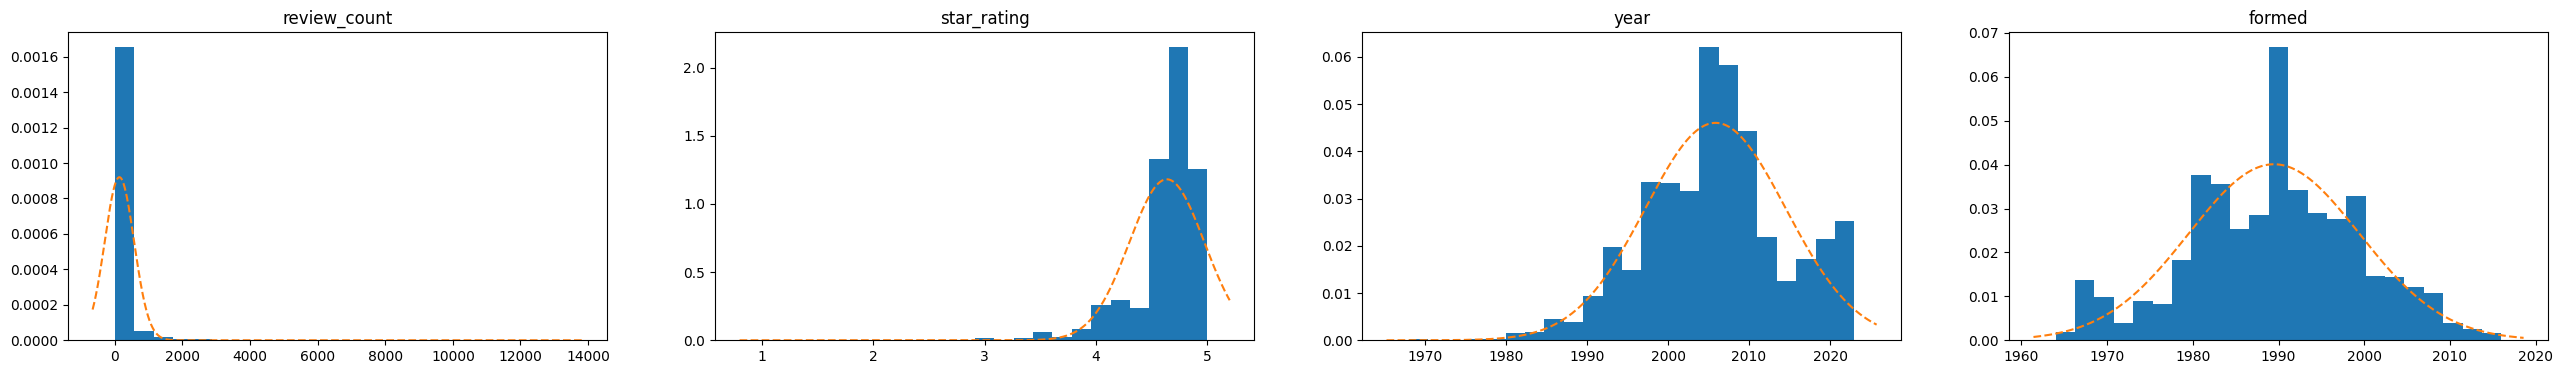

In [5]:
df_all['year'] = df_all['year'].apply(lambda x: None if x > 2024 or x < 1950 else x)
df = df_all.copy()
keys = ['review_count', 'star_rating', 'year', 'formed']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

Представим графики в более наглядном виде, отбросив "хвосты":

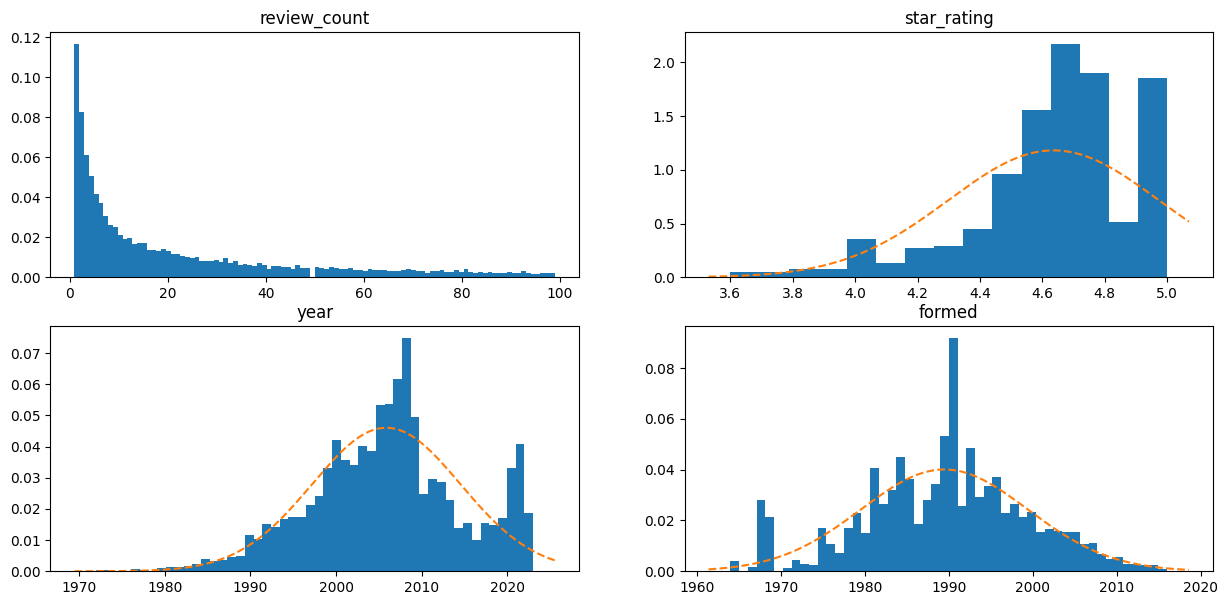

In [6]:
plt.figure(figsize=(15, 7))

key = 'review_count'
g = plt.subplot(2, 2, 1)
plt.hist(df[df[key]<100][key], density=True, bins=100)
g.set_title(key)

key = 'star_rating'
g = plt.subplot(2,2,2)
plt.hist(df[df[key] > 3.5][key], density=True, bins=15)
g.set_title(key)
loc = df[key].mean()
scale = df[key].std()
x_left, x_right = g.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=loc, scale=scale)
g.plot(x, y, linestyle='dashed')

key = 'year'
g = plt.subplot(2,2,3)
plt.hist(df[df[key] > 1970][key], density=True, bins=50)
g.set_title(key)
x_left, x_right = g.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=df[key].mean(), scale=df[key].std())
g.plot(x, y, linestyle='dashed')

key = 'formed'
g = plt.subplot(2,2,4)
plt.hist(df[key], density=True, bins=50)
g.set_title(key)
x_left, x_right = g.get_xlim()
x = np.linspace(x_left, x_right, 10000)
y = stats.norm.pdf(x, loc=df[key].mean(), scale=df[key].std())
g.plot(x, y, linestyle='dashed')

plt.show()

Сложно говорить о нормальном распределении, опираясь только на визуальный анализ гистограмм. Однако из графиков можно вытащить следующую полезную информацию: пик популярности метала приходится на 90-й год, это раз, и два - металхеды весьма предвзяты в отношении оценивания альбомов (ожидался хоть какой-то намек на нормальное распределение рейтинга, однако люди предпочитают ставить "5", не раздумывая).
Впредь не будем рассматривать количество обзоров.

**Квантили**

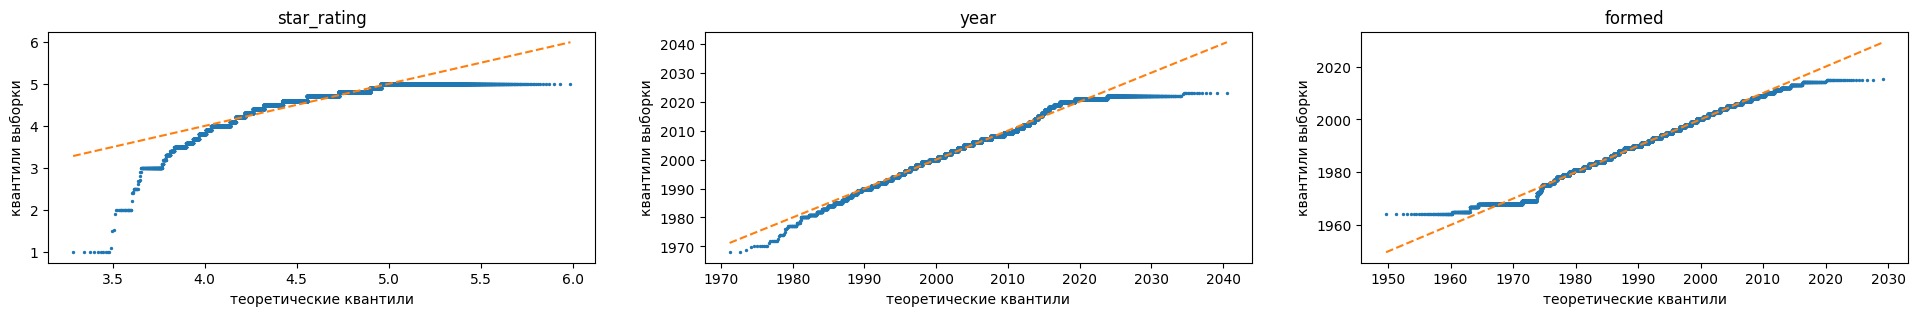

In [7]:
df = df_all.copy()

keys = ['star_rating', 'year', 'formed']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 3)
axes = axes.flatten()

for i in range(0, 3):
  cur_ax = axes[i]

  loc = df[keys[i]].mean()
  scale = df[keys[i]].std()
  
  interval = np.linspace(0, 1, df[keys[i]].shape[0])[1:-1]
  x = stats.norm.ppf(interval, loc=loc, scale=scale)

  y = np.quantile(df[keys[i]].dropna(), interval)

  cur_ax.scatter(x, y, s=2)
  cur_ax.plot(x, x, color='C1', linestyle='dashed')
  
  cur_ax.set_title(keys[i])
  cur_ax.set_xlabel('теоретические квантили')
  cur_ax.set_ylabel('квантили выборки')

**Статистические показатели для выборок**

In [8]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

star_rating
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6706516194848253
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.8941915327722519
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9115340474368784

year
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.3143968375414435
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.45469905636317265
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.4656656465187452

formed
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.39103545014027036
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.5212955878602398
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.5637273654679928



Думаю, если бы выборка была больше, можно было бы проследить нормальное распределение оценок.

**Давайте находить зависимости**

Из данной таблицы можно получить много интересной информации: страны с наибольшим количеством альбомов, самый популярный жанр для каждой из стран, наиболее оцениваемый жанр... Начнем с продуктивности стран:

In [112]:
df = df_all.copy()
d = {}
for country in df['country'].unique():
  if ((country != None) & (country == country)):
    d[country] = df[df['country'] == country].shape[0]
arr = sorted(d.items(), key=lambda item:item[1], reverse=True)[:15]
arr

[('USA', 5809),
 ('United Kingdom', 2701),
 ('Sweden', 2003),
 ('Germany', 1600),
 ('Norway', 1107),
 ('Finland', 736),
 ('Canada', 550),
 ('The Netherlands', 373),
 ('Italy', 302),
 ('Brazil', 270),
 ('France', 231),
 ('Poland', 221),
 ('Denmark', 218),
 ('Australia', 217),
 ('Switzerland', 163)]

Какой жанр самый популярный? Где выше оценки?


In [113]:
df = df_all.copy()
for i in range(0, len(arr)):
  arr[i] = (arr[i][0], arr[i][1], 0, "")
genres = df['genre'].dropna().unique()

for i in range(0, len(arr)):
  #print(s)
  arr[i] = (arr[i][0], arr[i][1],df[df['country'] == arr[i][0]]['star_rating'].mean(), arr[i][3])
  count = [('', 0)] * len(genres)
  #print(count)
  for j in range(0, len(genres)):
    count[j] = (genres[j], df[(df['country'] == arr[i][0]) & (df['genre'] == genres[j])].shape[0])
  count = sorted(count, key=lambda item:item[1], reverse=True)
  arr[i] = (arr[i][0], arr[i][1], arr[i][2], count[0][0])
  print(arr[i][0])
  print("Средний рейтинг:", arr[i][2])
  print("Распространенный жанр:", arr[i][3])
arr.clear()

USA
Средний рейтинг: 4.6374405076679
Распространенный жанр: Pop
United Kingdom
Средний рейтинг: 4.601594090202178
Распространенный жанр: British
Sweden
Средний рейтинг: 4.662052877138413
Распространенный жанр: Death
Germany
Средний рейтинг: 4.65417737789203
Распространенный жанр: Pop
Norway
Средний рейтинг: 4.6562679425837326
Распространенный жанр: Black
Finland
Средний рейтинг: 4.667332382310984
Распространенный жанр: Progressive
Canada
Средний рейтинг: 4.652819548872181
Распространенный жанр: Pop
The Netherlands
Средний рейтинг: 4.606906077348066
Распространенный жанр: Death
Italy
Средний рейтинг: 4.581138790035587
Распространенный жанр: Death
Brazil
Средний рейтинг: 4.623144104803494
Распространенный жанр: Black
France
Средний рейтинг: 4.6573394495412845
Распространенный жанр: Death
Poland
Средний рейтинг: 4.704807692307693
Распространенный жанр: Death
Denmark
Средний рейтинг: 4.622885572139303
Распространенный жанр: Progressive
Australia
Средний рейтинг: 4.690865384615385
Распростр

У какого жанра в общем случае наивысшие оценки?

In [114]:
arr.clear()
arr = [()] * len(genres)
for i in range(0, len(genres)):
  arr[i] = (genres[i], df[df['genre'] == genres[i]]['star_rating'].mean())
sorted(arr, key=lambda item:item[1], reverse=True)

[('Pop', 4.710629921259843),
 ('Black', 4.673927038626609),
 ('Death', 4.672868462757527),
 ('Alternative', 4.6145592657066),
 ('Progressive', 4.59055741699665),
 ('Thrash/Speed', 4.553137365743358),
 ('British', 4.503820375335121)]

А что там у наших?

In [115]:
print(df[df['country'] == 'Russia'].shape[0])
print("Средний рейтинг:", df[df['country'] == 'Russia']['star_rating'].mean())

13
Средний рейтинг: 4.816666666666667


На Amazon'e наших работ немного, однако, оцениваются они непредвзято.

**Каким образом год может повлиять на оценку?**

Моя теория состоит в том, что в среднем новые альбомы оцениваются хуже, чем старые. Так ли это? 

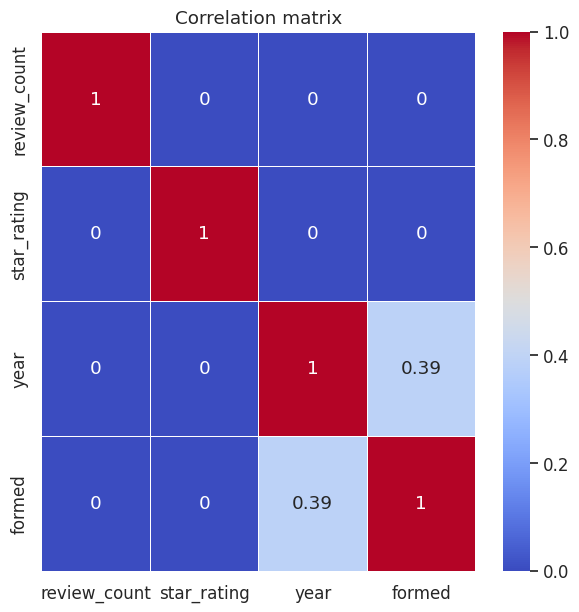

In [121]:
df = df_all.copy()

plt.figure(figsize = (7,7))

sns.set(font_scale=1.1)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

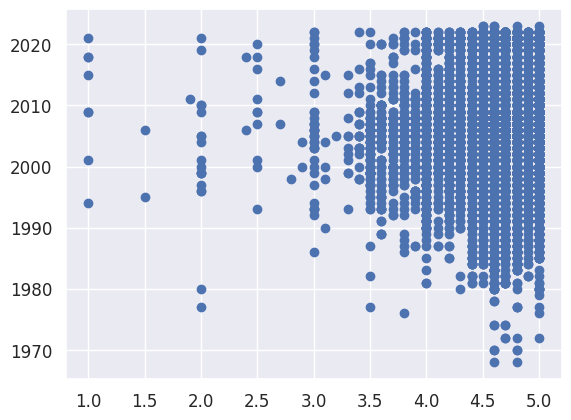

In [122]:
from sklearn.linear_model import LinearRegression
plt.scatter(df['star_rating'], df['year'])
plt.show()

Рассчитаем коэффициенты регрессии и изначения для каждого из значений выборок.

In [124]:
df = df_all.copy().dropna()
x = np.array(df['star_rating']).reshape(-1, 1)
y = np.array(df['year'])
model = LinearRegression().fit(x, y)
R2 = model.score(x, y)
print('коэф детерминации', R2)

коэф детерминации 0.0007480555474436157


Визуализируем зависимость:

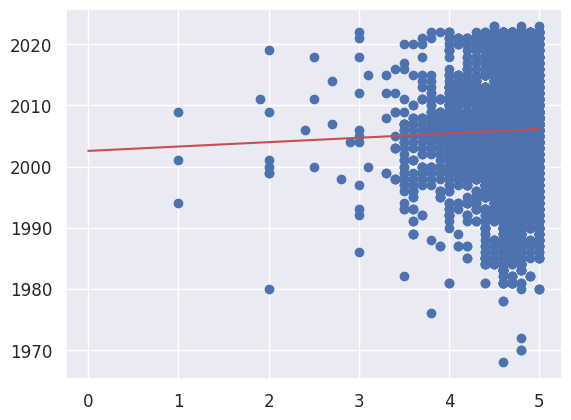

In [127]:
b = model.intercept_
k = float(model.coef_)
x = np.linspace(0, 5, 1000)
y = k*x + b

plt.scatter(df['star_rating'], df['year'])

plt.plot(x, y, color = 'r')
plt.show()

In [130]:
df = df_all.copy()
df.isnull().sum()

artist            487
media             233
review_count     2213
star_rating      2212
title               0
year            16729
genre               0
country         13690
formed          13685
dtype: int64